In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

# extract Zip file

In [2]:
zip_path = r'C:\Users\krunal sheth\Downloads\wine+quality.zip'
extract_to = 'exctraced_files'

with zipfile.ZipFile(zip_path,'r')as zip_ref:
    zip_ref.extractall(extract_to)

print(f'files extract to: {extract_to}')

files extract to: exctraced_files


In [3]:
df = pd.read_csv(r'exctraced_files/winequality-red.csv',delimiter=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.duplicated().sum()

240

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
df['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

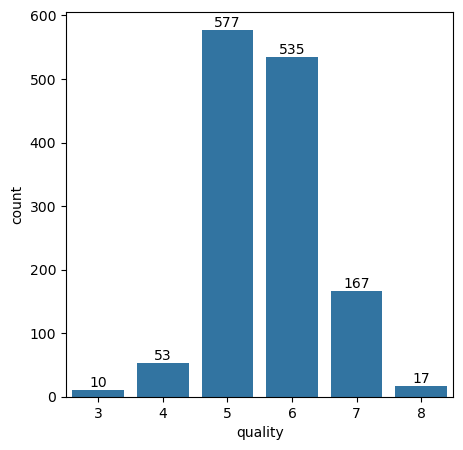

In [13]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'quality', data = df)
ax.bar_label(ax.containers[0])
plt.show()

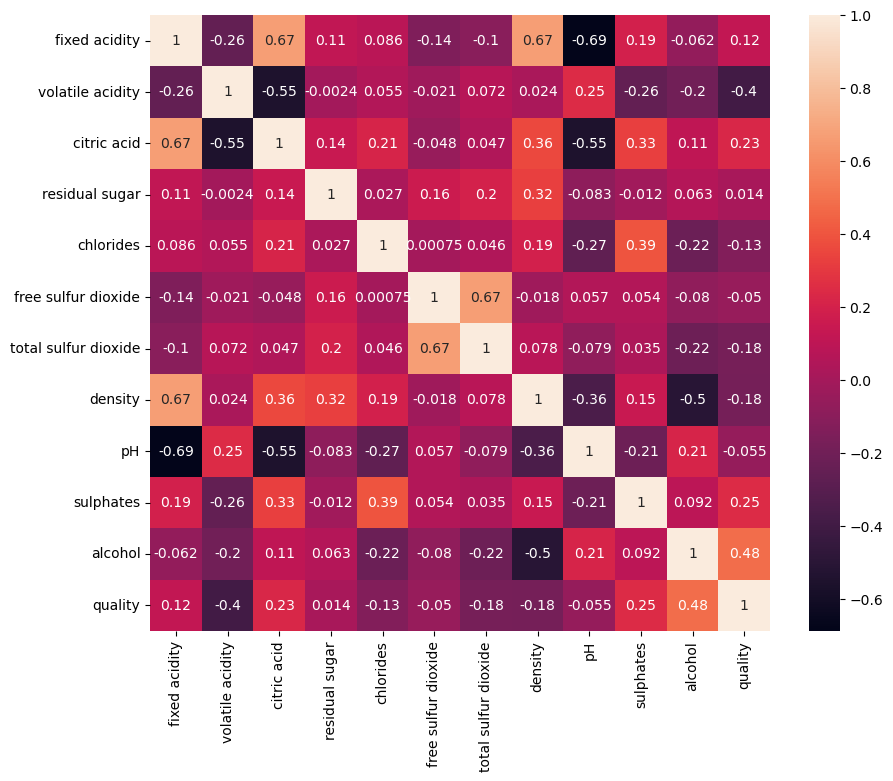

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True)
plt.show()

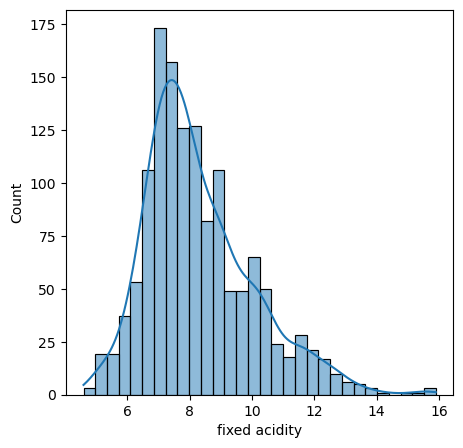

In [17]:
plt.figure(figsize = (5,5))
sns.histplot(x = 'fixed acidity', data = df,kde = True)
plt.show()

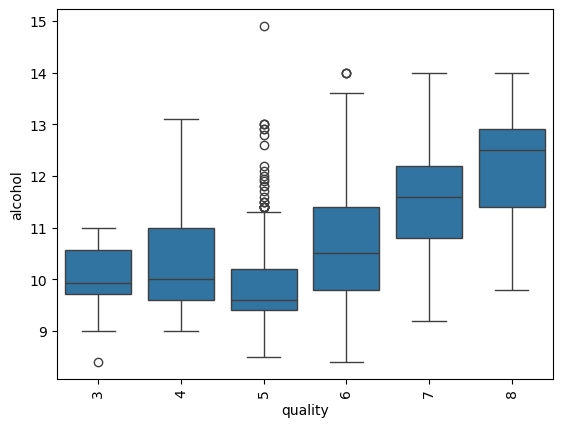

In [20]:
sns.boxplot(x = 'quality', y = 'alcohol',data = df)
plt.xticks(rotation = 90)
plt.show()

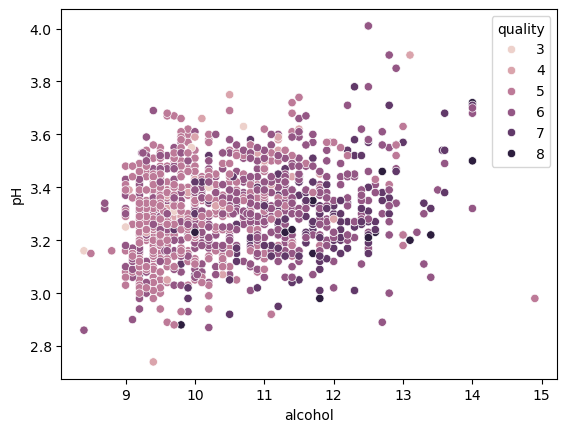

In [19]:
sns.scatterplot(x = 'alcohol', y = 'pH', hue = 'quality', data = df)
plt.show()

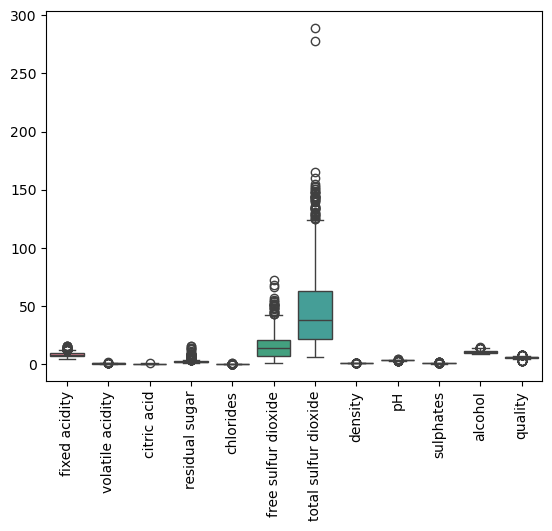

In [21]:
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.show()

In [22]:
df['quality'] = df['quality'].apply(lambda x:1 if x > 6.5 else 0)

In [23]:
df['quality'].value_counts()

quality
0    1175
1     184
Name: count, dtype: int64

In [24]:
y = df['quality']
x = df.drop(['quality'],axis = 1)

# For imbalance data 

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)

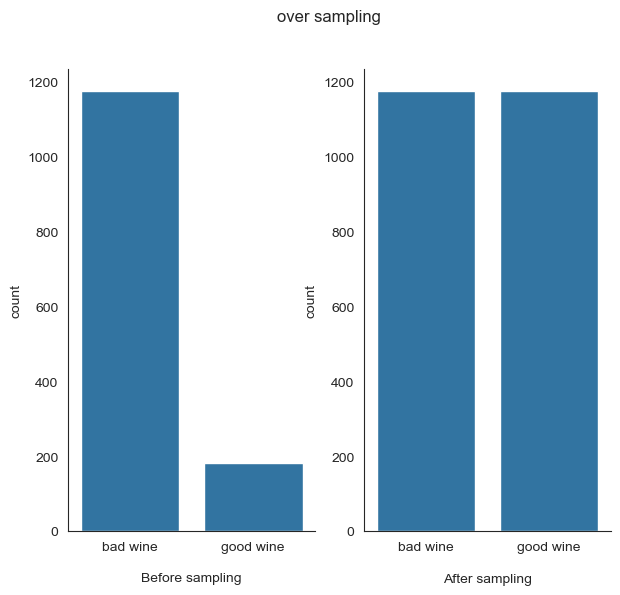

In [33]:
sns.set_style("white")
plt.figure(figsize = (7,6))

plt.subplot(1,2,1)
sns.countplot(data = df, x = 'quality')
plt.xticks([0,1],['bad wine','good wine'])
plt.xlabel('\nBefore sampling')

plt.subplot(1,2,2)
sns.countplot(data = df, x = y_smote)
plt.xticks([0,1],['bad wine','good wine'])
plt.xlabel('\nAfter sampling')

plt.suptitle('over sampling \n\n\n')
sns.despine()

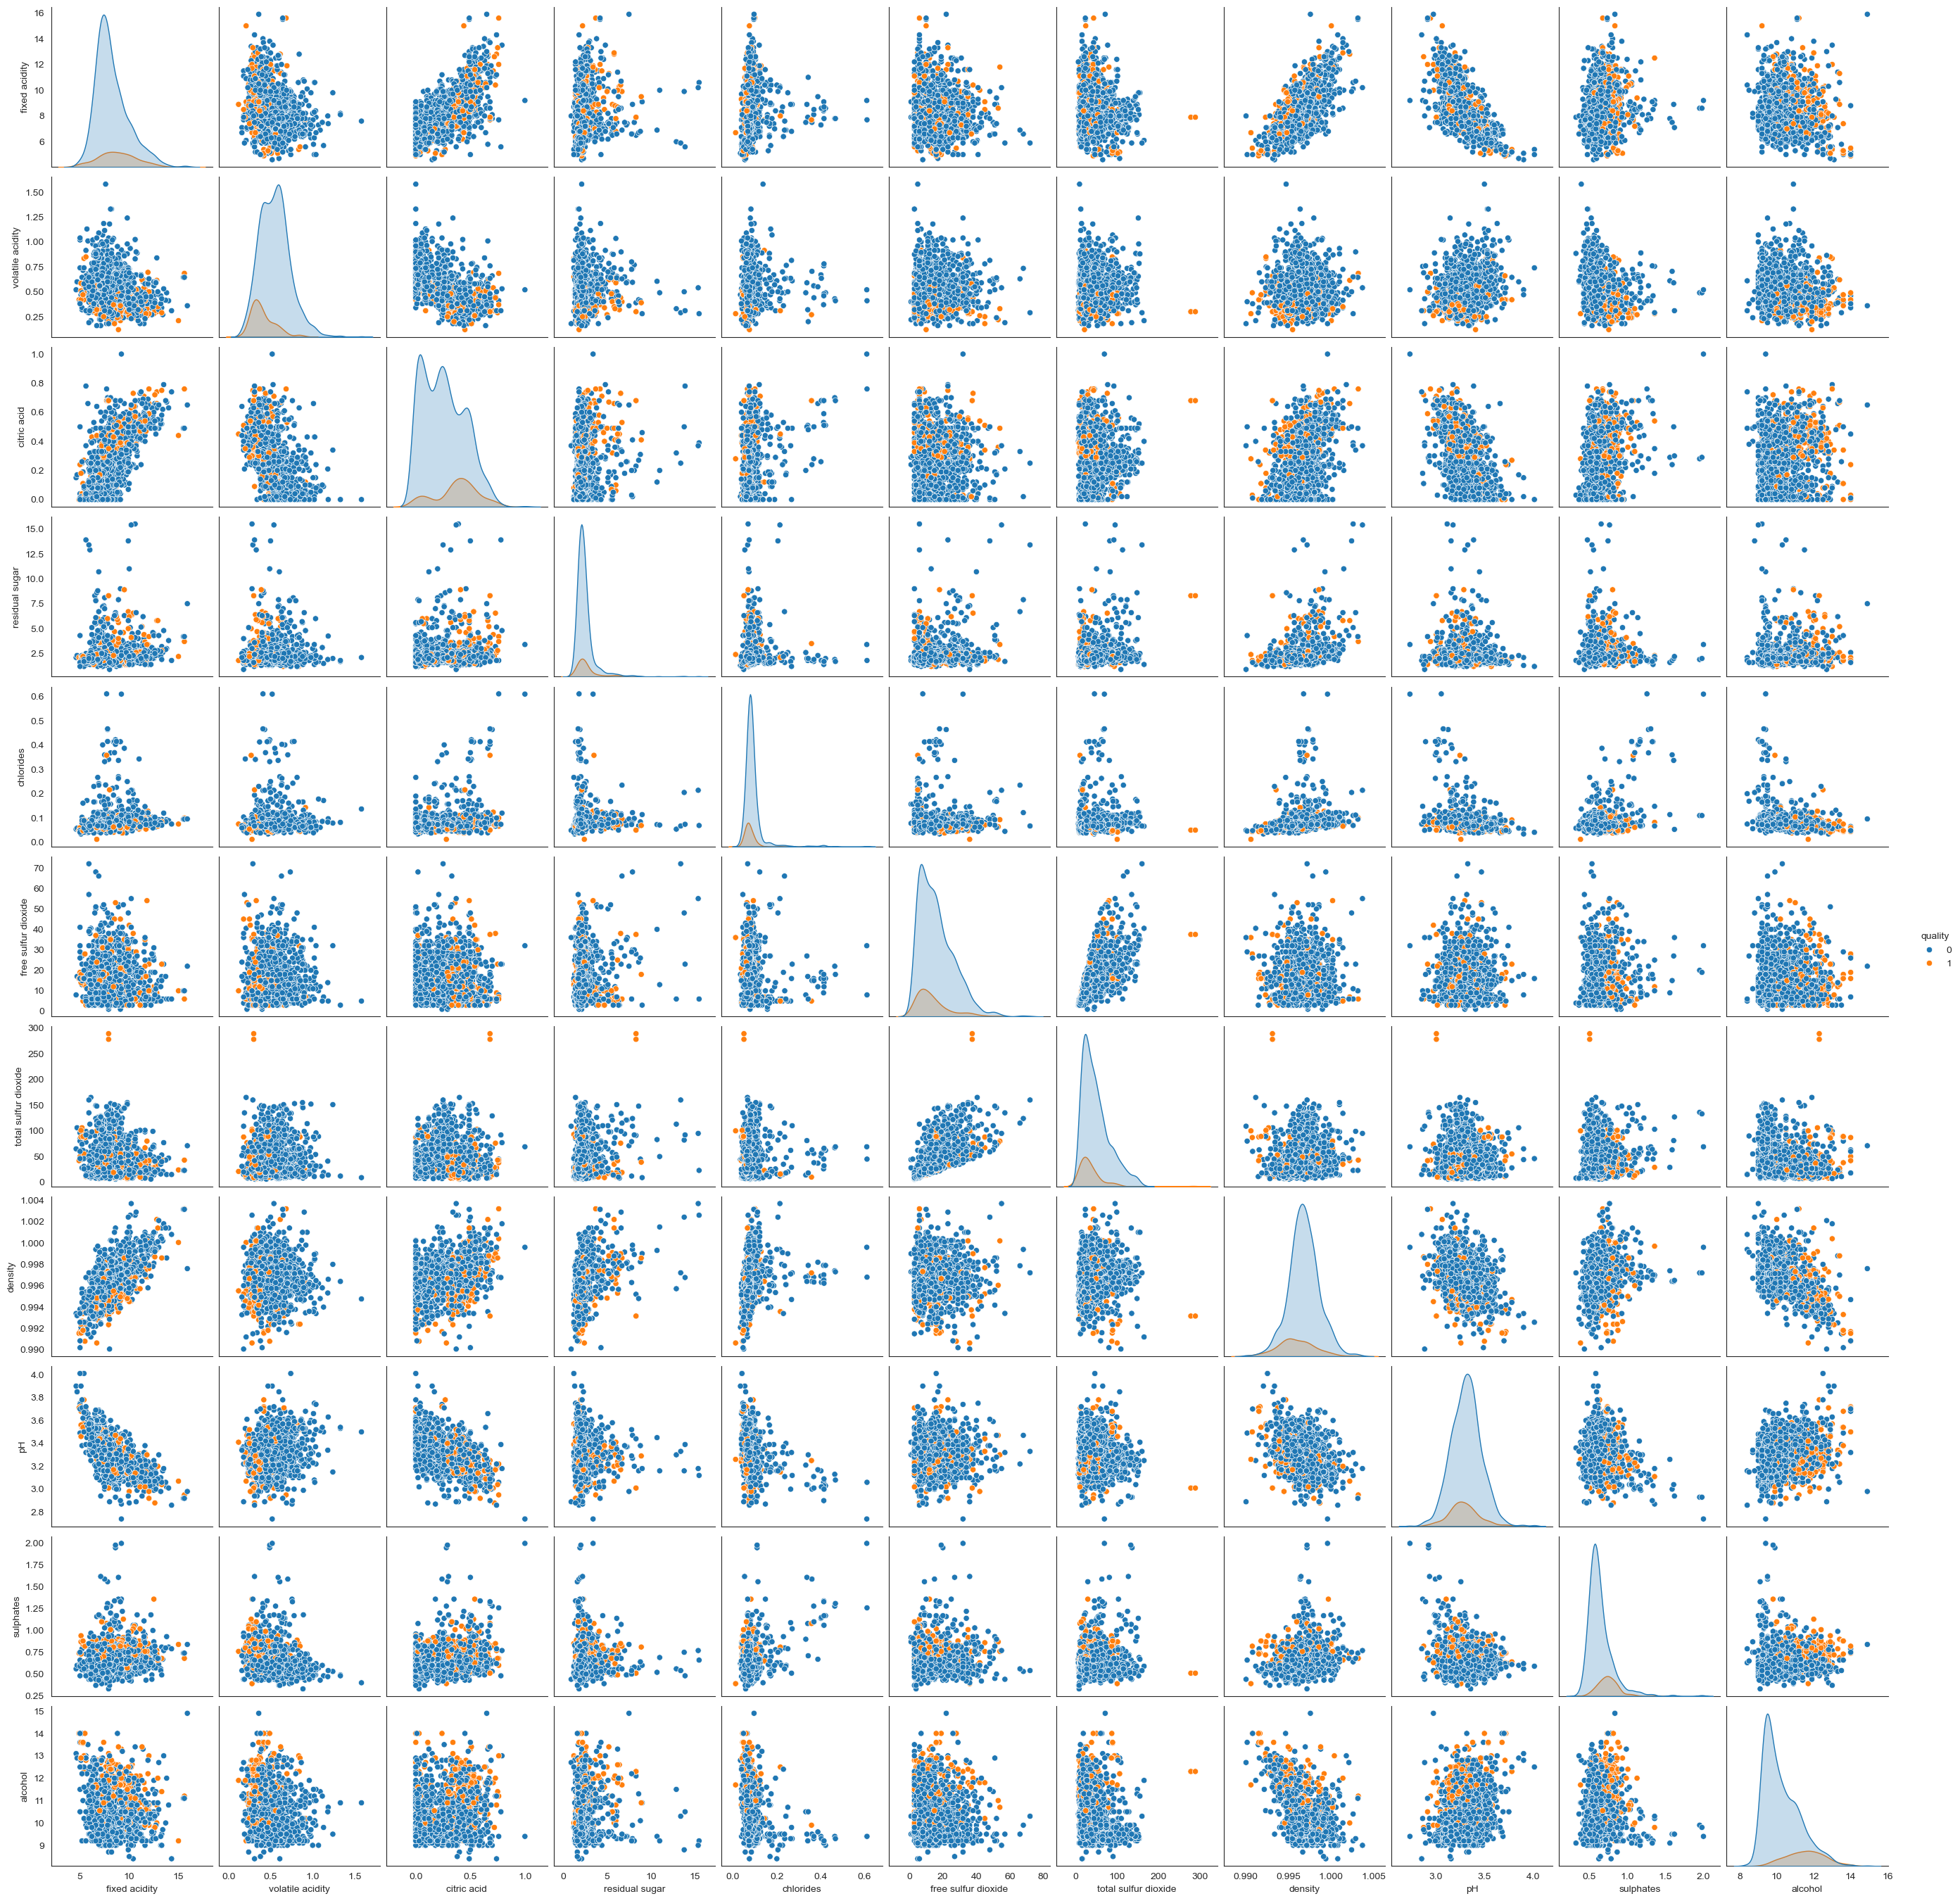

In [34]:
sns.pairplot(data = df,hue = 'quality',diag_kind = 'kde')
plt.show()

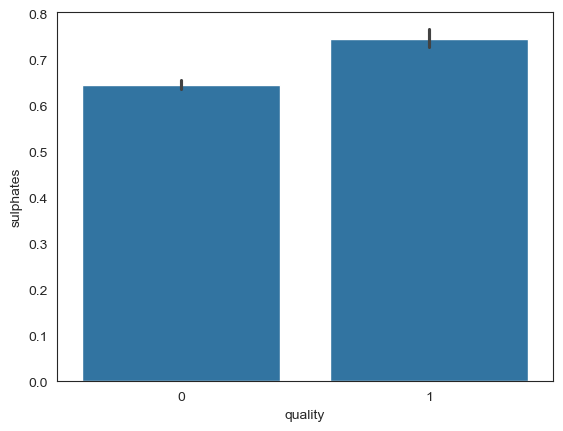

In [36]:
sns.barplot(x = 'quality', y = 'sulphates', data = df)
plt.show()

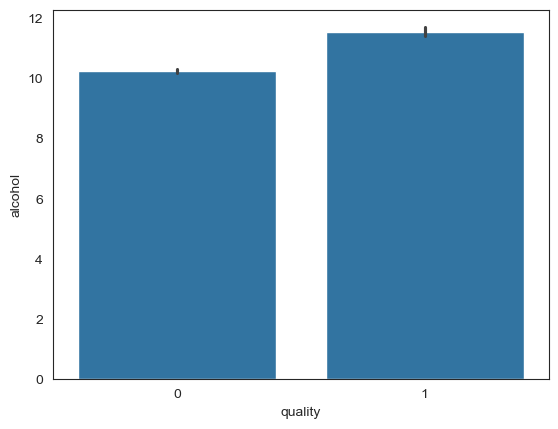

In [37]:
sns.barplot(x = 'quality', y = 'alcohol', data = df)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_train

array([[-0.65061929,  1.83637328, -0.68095727, ..., -0.94418676,
        -1.11692519, -1.18006263],
       [ 0.31145666, -0.87359272,  0.51096992, ..., -0.0786156 ,
        -0.21998873,  1.11239566],
       [-0.01590956, -0.91703418,  0.50730083, ..., -0.99972701,
         0.12181595,  0.77962022],
       ...,
       [-0.65061929,  0.73917893, -0.31458057, ..., -0.05447566,
        -0.85816084, -0.97667258],
       [-0.99221127, -0.0318225 , -1.25669207, ...,  0.01396366,
        -0.27594105, -1.15100691],
       [ 0.20336065, -0.92143954, -0.05288293, ..., -0.87574744,
        -0.92285193, -0.45366959]])

In [41]:
x_scaled_test = scaler.transform(x_test)
x_scaled_test

array([[ 0.41866476, -0.4702409 ,  0.74580158, ...,  0.24007843,
         0.56218432,  1.08499966],
       [-0.36595931, -0.44697712, -0.15756199, ...,  0.01396366,
         1.47071833, -1.23817408],
       [ 1.20557836, -0.88339281,  0.88626531, ..., -0.27916372,
         0.65048338, -0.33360911],
       ...,
       [ 1.05922729, -0.8573492 ,  1.62082563, ..., -0.26115443,
         0.30770796,  0.24559352],
       [ 1.11427259,  0.20540871,  1.67432149, ..., -1.42326197,
        -0.21124996,  0.76667073],
       [-0.08322201, -0.99230107,  0.81337066, ..., -0.23543963,
        -0.27812576,  1.01413499]])

In [42]:
from sklearn.svm import SVC
classifier = SVC()

In [43]:
classifier.fit(x_scaled_train,y_train)

SVC()

In [44]:
classifier.score(x_scaled_train,y_train)

0.8948328267477204

In [45]:
classifier.score(x_scaled_test,y_test)

0.8780141843971632

# prediction

In [47]:
pre = scaler.transform([[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]])
pre

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.65061929,  1.33225696, -1.6754083 , -0.5347356 , -0.16447052,
        -0.36039421, -0.2280967 ,  0.72063134,  1.45118928, -0.85816084,
        -1.32534124]])

In [48]:
classifier.predict([[-0.65061929,  1.33225696, -1.6754083 , -0.5347356 , -0.16447052,
        -0.36039421, -0.2280967 ,  0.72063134,  1.45118928, -0.85816084,
        -1.32534124]])

array([0], dtype=int64)

# confusion matrix

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

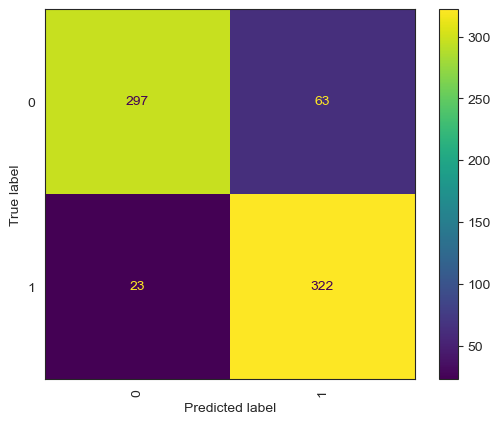

In [50]:
ConfusionMatrixDisplay.from_estimator(classifier, x_scaled_test, y_test)
plt.xticks(rotation=90)
plt.show()

In [51]:
y_pred = classifier.predict(x_scaled_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       360
           1       0.84      0.93      0.88       345

    accuracy                           0.88       705
   macro avg       0.88      0.88      0.88       705
weighted avg       0.88      0.88      0.88       705



In [56]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

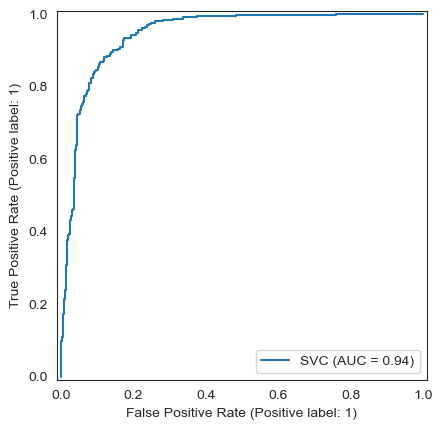

In [58]:
RocCurveDisplay.from_estimator(classifier,x_scaled_test,y_test)